# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [ ]:
# Module handling
import os
import sys
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Plots, visualisations and tests
import matplotlib.pyplot as plt
import seaborn as sns
from tests.test1 import Test
# Utils
import numpy as np
import pandas as pd
from dataclasses import dataclass
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Set numpy seed
np.random.seed(2**12)

# Przydatne funkcje 

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt. Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [3]:
def generate_uniform_points(left, right, n = 10 ** 5, return_DataFrame = False):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    ::param return_DataFrame: True - zwróć obiekt DataFrame, False - zwróc listę krotek
    :return: Lista krotek lub DataFrame punktów o wartościach X oraz Y, zależnie od parametru return_DataFrame
    """
    random_pairs = np.random.uniform(left, right, size=(n, 2))
    tuples = [tuple(row) for row in random_pairs]
    return pd.DataFrame(data=tuples, columns=['X', 'Y']) if return_DataFrame else tuples

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [4]:
points_a_df = generate_uniform_points(-1000, 1000, 10 ** 5, return_DataFrame=True)

Zwizualizuj wygenerowane punkty

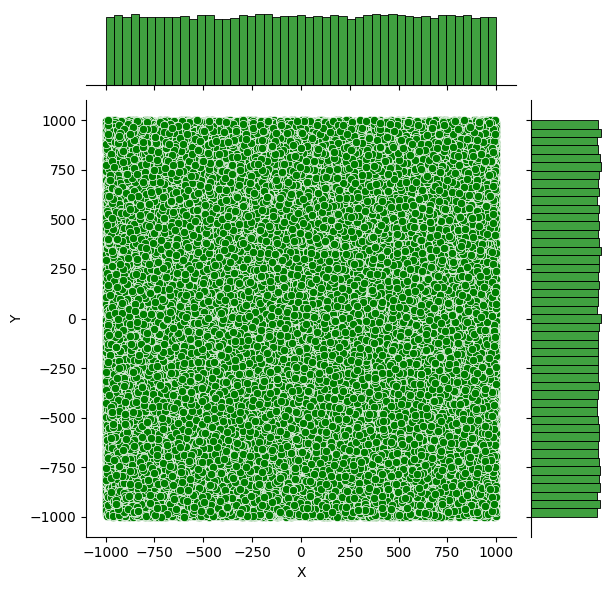

In [5]:
sns.jointplot(data=points_a_df, x='X', y='Y', kind="scatter", color='#008000')

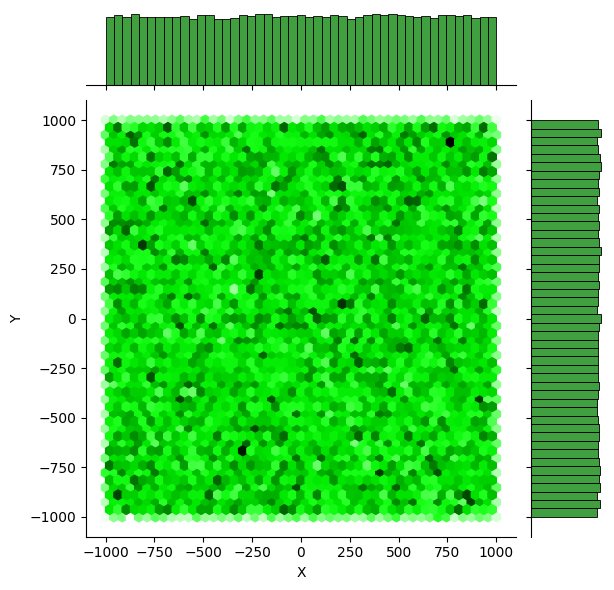

In [6]:
sns.jointplot(data=points_a_df, x='X', y='Y', kind="hex", color='#008000')

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [7]:
points_b_df = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5, return_DataFrame=True)

Zwizualizuj wygenerowane punkty.

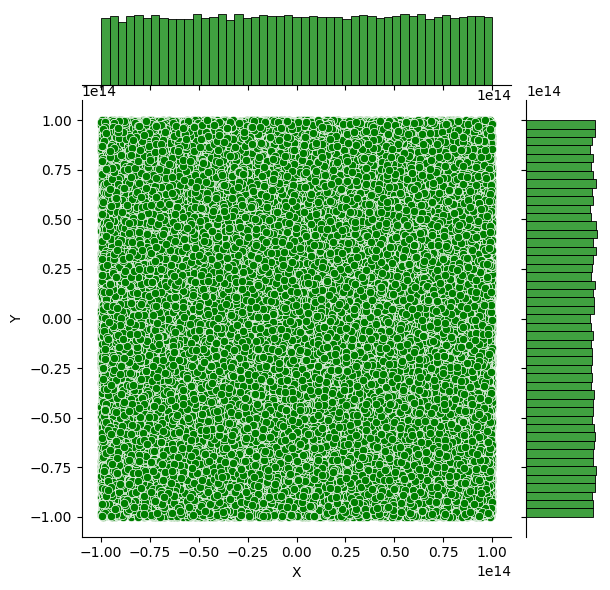

In [ ]:
sns.jointplot(data=points_b_df, x='X', y='Y', kind='scatter', color="#008000")

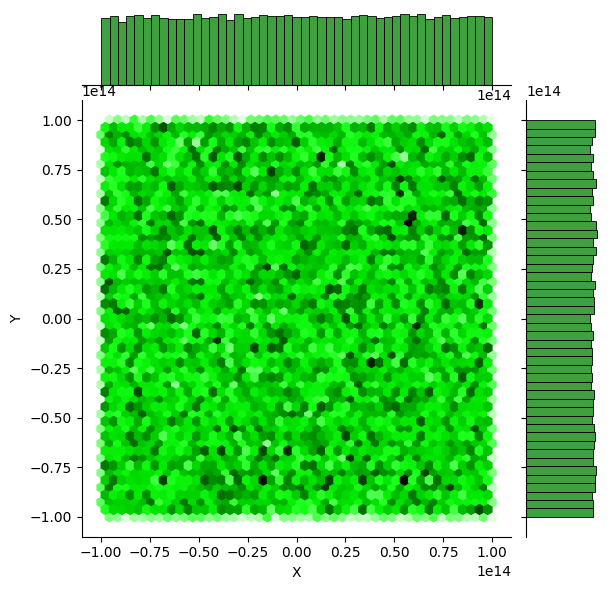

In [ ]:
sns.jointplot(data=points_b_df, x='X', y='Y', kind='hex', color="#008000")

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [8]:
def generate_circle_points(O, R, n = 1000, return_DataFrame=False):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    ::param return_DataFrame: True - zwróć obiekt DataFrame, False - zwróc listę krotek
    :return: Lista krotek lub DataFrame punktów o wartościach X oraz Y ,zależnie od parametru return_DataFrame
    """
    
    angles = np.random.uniform(0, 2 *np.pi, n)
    x = R * np.cos(angles) + O[0]
    y = R * np.sin(angles) + O[1]
    tuples = [(x[i], y[i]) for i in range(n)]

    return pd.DataFrame(data=tuples, columns=['X', 'Y']) if return_DataFrame else tuples

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [9]:
points_c_df = generate_circle_points((0, 0), 100, return_DataFrame=True)

Zwizualizuj wygenerowane punkty.

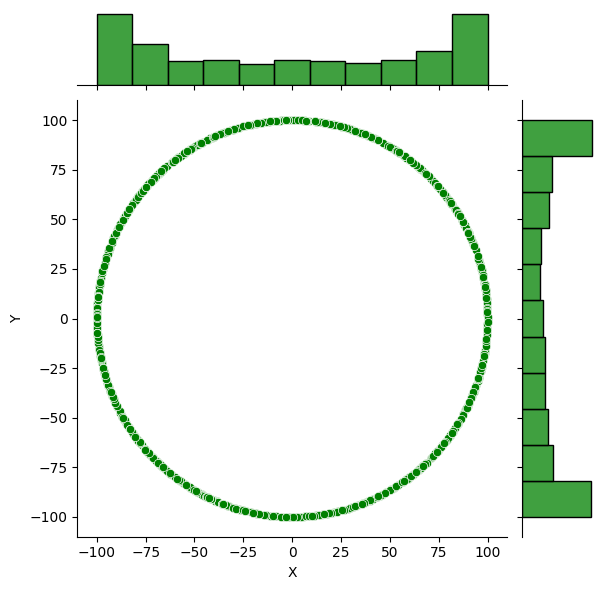

In [53]:
sns.jointplot(data=points_c_df, x='X', y='Y', kind='scatter', color="#008000")

Uzupełnij funkcję ```generate_collinear_points```.

In [10]:
def generate_collinear_points(a, b,n=1000, x_lower_bound=-1000, x_upper_bound=1000,return_DataFrame=False ):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    ::param return_DataFrame: True - zwróć obiekt DataFrame, False - zwróc listę krotek
    :return: Lista krotek lub DataFrame punktów o wartościach X oraz Y ,zależnie od parametru return_DataFrame
    """
    a1,a2 = a
    b1,b2 = b
    v = (a1-b1,a2-b2)
    x_normalised_lower_bound = (x_lower_bound-a[0])/abs(v[0]) 
    x_normalised_upper_bound = (x_upper_bound-a[0])/abs(v[0])
    points = np.random.uniform(x_normalised_lower_bound,x_normalised_upper_bound,n)
    tuples = [(a1 + point * v[0], a2 + point * v[1]) for point in points]
    return pd.DataFrame(data=tuples, columns=['X','Y']) if return_DataFrame else tuples

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [25]:
points_d_df = generate_collinear_points((-1.0, 0.0), (1.0,0.1), x_lower_bound=-1000,x_upper_bound=1000, return_DataFrame=True)

Zwizualizuj wygenerowane punkty.

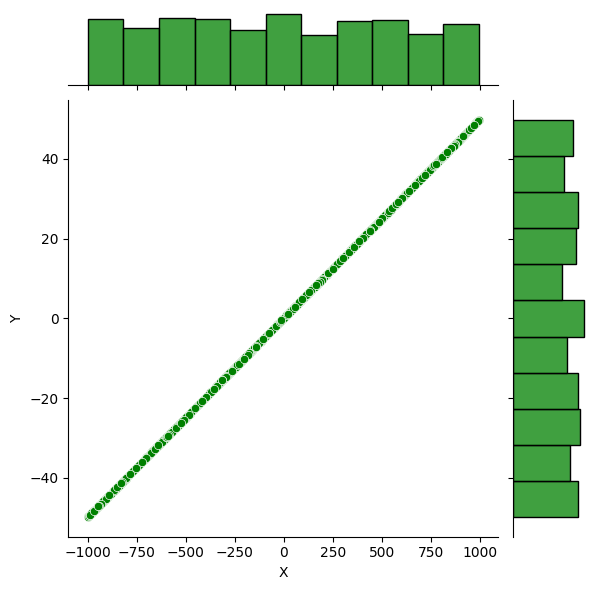

In [ ]:
sns.jointplot(data=points_d_df, x='X', y='Y', kind='scatter', color="#008000")

Przeprowadź test poprawności powyższych funkcji

In [11]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.234s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [12]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    a1, a2 = a
    b1, b2 = b
    c1, c2 = c
    a3 = b3 = c3 = 1
    return a1*b2*c3 + a2*b3*c1 + a3*b1*c2 - a3*b2*c1 - a2*b1*c3 - b3*c2*a1
  

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [13]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    a1, a2 = a
    b1, b2 = b
    c1, c2 = c
    a3 = b3 = c3 = 1
    return np.linalg.det([[a1,a2,a3],
                          [b1,b2,b3],
                          [c1,c2,c3]])

Uzupełnij funkcje ```mat_det_2x2```

In [14]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    a1,a2 = a
    b1,b2 = b
    c1,c2 = c
    return (a1-c1) * (b2-c2) - (a2-c2) * (b1-c1)

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [15]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    a1,a2 = a
    b1,b2 = b
    c1,c2 = c
    return np.linalg.det([[a1-c1, a2-c2],
                          [b1-c1, b2-c2]])
  

Przetestujmy napisane powyżej funkcje.

In [16]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.016s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [17]:
def categorize_points(points: pd.DataFrame, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: DataFrame zawierający zbiory punktów: leżące na prostej, leżące na lewo od prostej, leżące na prawo od prostek,
             w postaci wierszy o wartościach X, Y oraz Category
    """
    Left = []
    Right = []
    Middle = []
    
    for _, row in points.iterrows():
      c = (row['X'], row['Y'])
      orient = mat_det_func(a,b,c)
      if(abs(orient) <= eps): Middle.append(c)
      elif(orient < 0): Right.append(c)
      elif(orient > 0): Left.append(c)
    
    left_df = pd.DataFrame(data=Left, columns=['X','Y'])
    mid_df = pd.DataFrame(data=Middle, columns=['X','Y'])
    right_df = pd.DataFrame(data=Right, columns=['X','Y'])
    left_df['category'] = 'Left'
    right_df['category'] = 'Right'
    mid_df['category'] = 'Middle'
    
    return pd.concat([mid_df, left_df, right_df])

In [18]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

In [19]:
def draw_classified_points_plot(data, num_of_points, a,b, line=False):
  # Applying x_limit fixes X-axis errors
  x_limit = num_of_points + num_of_points//10 * 3
  ylim = (-x_limit, x_limit) if not line else None
  plot = sns.jointplot(data=data, hue='category', hue_order=['Left', 'Right', 'Middle'], x='X', y='Y', kind='scatter', xlim=(-x_limit, x_limit), ylim=ylim, legend=False)
  
  a1,a2 = a
  b1,b2 = b
  a_line_coeficient = (b2-a2)/(b1-a1)
  b_line_coefincient = a2 - a_line_coeficient * a1
  x_vals = np.linspace(-x_limit+num_of_points//10,x_limit-num_of_points//10,1000)
  y_vals = a_line_coeficient * x_vals + b_line_coefincient
  
  plot.ax_joint.plot(x_vals, y_vals, color='red')
  return plot
  

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [20]:
combined_df_a = categorize_points(points_a_df, a, b, mat_det_3x3, 10 ** -12)

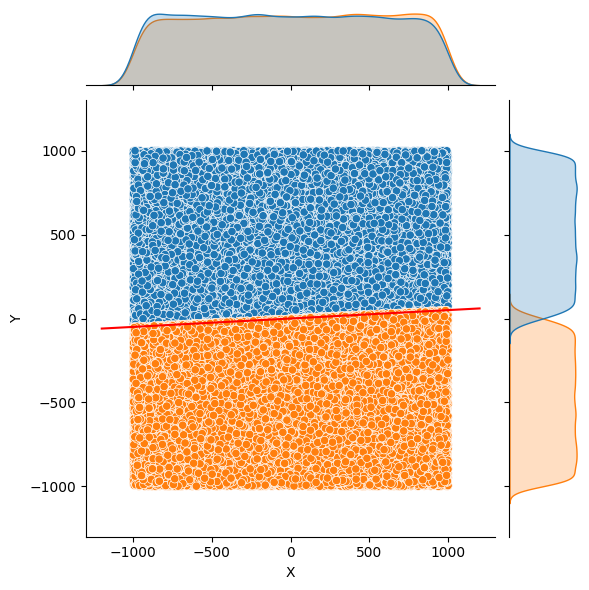

In [67]:
draw_classified_points_plot(combined_df_a,1000,a,b)

In [21]:
combined_df_b = categorize_points(points_b_df, a, b, mat_det_3x3_lib, 10 ** -12)

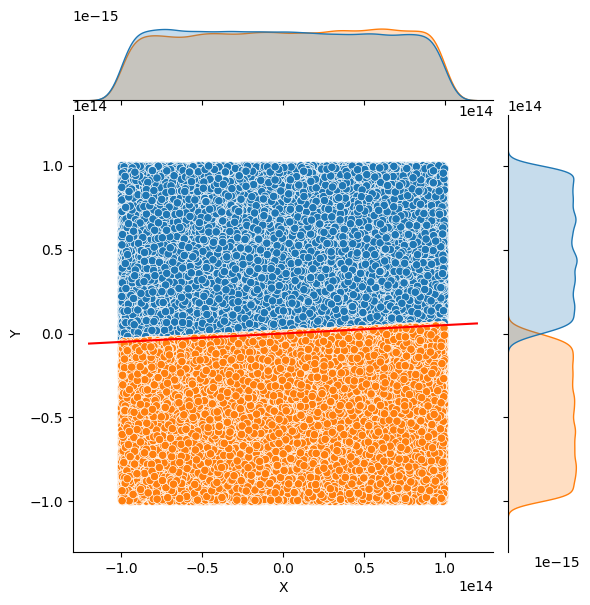

In [69]:
draw_classified_points_plot(combined_df_b, 10**14, a,b)

In [22]:
df_combined_c = categorize_points(points_c_df, a, b, mat_det_2x2, 10 ** -12)

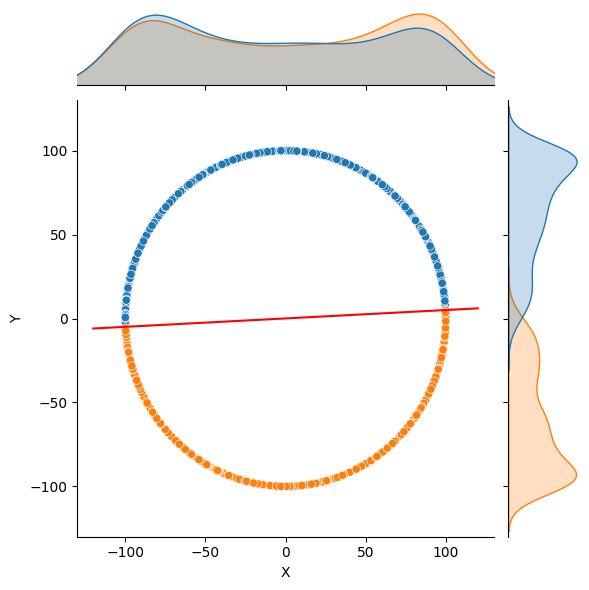

In [71]:
draw_classified_points_plot(df_combined_c,100, a,b)

In [23]:
df_combined_d = categorize_points(points_d_df, a, b, mat_det_2x2_lib, 10 ** -12)

NameError: name 'points_d_df' is not defined

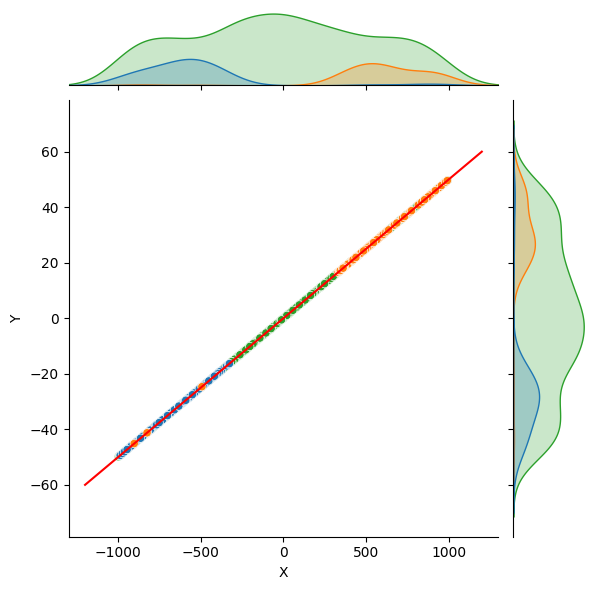

In [73]:
draw_classified_points_plot(df_combined_d,1000, a,b, line=True)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku. Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata.

## Generowanie zestawów danych do przeprowadzenia analizy.

In [24]:
# Conversion of X and Y fields in a given DataFrame to another data type (in our case float64 and float32)
def convert_df_to_type(df: pd.DataFrame, df_type):
   df[['X', 'Y']] = df[['X', 'Y']].astype(df_type)


In [27]:
# Define the Area, Circle, and Line classes as dataclasses
@dataclass
class Area:
  num_of_points: int
  axis_lim: float

@dataclass
class Circle:
  center: tuple[float, float]
  radius: float
  num_of_points: int
  axis_lim: float = None  # Optional field, can be derived from radius

  def __post_init__(self):
    # Automatically set axis_lim to radius if not provided
    if self.axis_lim is None:
      self.axis_lim = self.radius

@dataclass
class Line:
  a: tuple[float, float]
  b: tuple[float, float]
  num_of_points: int
  axis_lim: float

# Define the TestConfig class as a dataclass
@dataclass
class TestConfig:
  a: tuple[float, float] = (-1.0, 0.0)
  b: tuple[float, float] = (1.0, 0.1)
  epsilon: list[float] = (0, 10**(-14), 10**(-12), 10**(-10), 10**(-8))
  collections: list = None
  determinants: list = None
  float_type: list = None
  NAMES: list[str] = ('A', 'B', 'C', 'D')

  def __post_init__(self):
    # Initialize collections, determinants, and float_type if not provided
    if self.collections is None:
      self.collections = [
        Area(10**5, 10**3),
        Area(10**5, 10**14),
        Circle((0, 0), 10**2, 10**3),
        Line(self.a, self.b, 1000, 1000)
      ]
    if self.determinants is None:
      self.determinants = [mat_det_3x3, mat_det_3x3_lib, mat_det_2x2, mat_det_2x2_lib]
    if self.float_type is None:
      self.float_type = [np.float64, np.float32]

# Create an instance of TestConfig
config = TestConfig()

In [28]:


def generate_test_cases(collection_index: int, config: TestConfig, save_quallified_points: bool = False):
  a = config.a
  b = config.b
  epsilon = config.epsilon
  collections = config.collections
  determinants = config.determinants
  float_type = config.float_type
  NAMES = config.NAMES
  file_name = NAMES[collection_index]

  path_csv = os.path.join(os.curdir,'data')
  path_image = os.path.join(os.curdir,'plots', NAMES[collection_index])
  if(not os.path.exists(path_csv)):
    os.makedirs(path_csv)
  if(not os.path.exists(path_image)):
    os.makedirs(path_image)

  collection = collections[collection_index]
  points = pd.DataFrame([])
  if(type(collection) == Area):
    points = generate_uniform_points(-collection.axis_lim, collection.axis_lim, collection.num_of_points, return_DataFrame=True)
  if(type(collection) == Circle):
    points = generate_circle_points(collection.center, collection.radius, collection.num_of_points, return_DataFrame=True)
  if(type(collection) == Line):
    points = generate_collinear_points(collection.a,collection.b,collection.num_of_points,-collection.axis_lim,collection.axis_lim, return_DataFrame=True)
  
  csv_data = df = pd.DataFrame(columns=['precision', 'eps', 'det', 'left', 'middle', 'right'])
  filtered_df = pd.DataFrame()
  index = 0
  for precision_idx, precision in enumerate(float_type):
    # Convert points to appropriate type
    convert_df_to_type(points,precision)
    float_str = 'float32' if precision_idx == 1 else 'float64'
    for det in determinants:
      for e in epsilon:
        # Categorise points
        df = categorize_points(points,a,b,det,e)
        
        # If save_qualified_points option is True, output those points to additional files
        if(save_quallified_points):
          filtered_rows = df[df['category'] == 'Middle']
          filtered_rows = filtered_rows.assign(precision=float_str, e=e, det=det.__name__)
          filtered_df = pd.concat([filtered_df, filtered_rows], ignore_index=True)
        
        # Add data to csv_data DataFrame
        num_left = df['category'].value_counts().get('Left', 0)
        num_middle = df['category'].value_counts().get('Middle', 0)
        num_right = df['category'].value_counts().get('Right', 0)
        csv_data.loc[index] = [float_str, e, det.__name__, num_left, num_middle, num_right]
        index+=1
        
        # Save data plot
        figure = draw_classified_points_plot(df,collection.axis_lim,a,b,type(collection) == Line)
        figure.savefig(os.path.join(path_image, f'{NAMES[collection_index]} {float_str} {e} {det.__name__}.jpg'))

  
  # Sort and save data to csv file for further analysis
  csv_data.sort_values(by=['eps', 'det'], inplace=True)
  csv_data.to_csv(os.path.join(path_csv, f'{file_name}.csv'), sep=';', index=False)
  
  # Save middle poitns
  if(save_quallified_points):
    filtered_df.to_csv(os.path.join(path_csv, f'{file_name}_middle.csv'), sep=';', index=False)
    

In [ ]:
# Generate data for each set
for i in range(4):
  generate_test_cases(i, config)

In [ ]:
generate_test_cases(1, True)

## Analiza i wnioski przedstawione w sprawozdaniu

In [59]:
def draw_B_points_on_line(data, a,b, line=True):
  # Applying x_limit fixes X-axis errors
  x_limit = (max(data['X']) - min(data['X']))//2
  plot = sns.jointplot(data=data, hue_order=['Left', 'Right', 'Middle'], x='X', y='Y', kind='scatter', legend=False)
  a1,a2 = a
  b1,b2 = b
  a_line_coeficient = (b2-a2)/(b1-a1)
  b_line_coefincient = a2 - a_line_coeficient * a1
  x_vals = np.linspace(-x_limit*(1.1),x_limit*(1.1),1000)
  y_vals = a_line_coeficient * x_vals + b_line_coefincient
  
  plot.ax_joint.plot(x_vals, y_vals, color='red')
  return plot
  

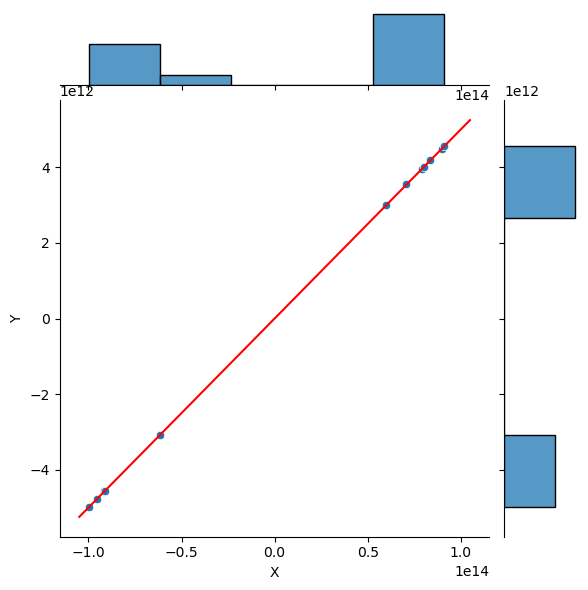

In [60]:
df_b_middle = pd.read_csv(os.path.join('data', 'B_middle.csv'), delimiter=';')
plot = draw_B_points_on_line(df_b_middle[['X','Y']], a, b)